# **Customer Churn Prediction**


**Import Your Libraries**

Every project starts by importing the "toolkits" we need. We are importing three:

1.pandas: The primary library for loading, managing, and cleaning data in tables (DataFrames).

2.matplotlib.pyplot: The foundational library for creating plots and charts.

3.seaborn: A more advanced library (built on matplotlib) that makes our plots look more professional and easier to create.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional visual style for our plots
sns.set(style="whitegrid")

print("Step 1: Libraries imported successfully.")

Step 1: Libraries imported successfully.


**Load Dataset**

In [2]:
# Define the file name
file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Use pandas (pd) to read the CSV file
df = pd.read_csv(file_path)

print("Step 2: Data loaded successfully.")
print(f"Our dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Step 2: Data loaded successfully.
Our dataset has 7043 rows and 21 columns.


**Inspect the Data (Find the Problem)**

This is the most important "Analyst" step. We never trust data. We inspect it first. We'll use df.info() to check the "data types." We are looking for problems.

In [3]:
print("Step 3: Inspecting data types with df.info()...")
df.info()

Step 3: Inspecting data types with df.info()...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 

**Clean the Data (Fix the Problem)**

We will now fix the TotalCharges column.
We force it to become a number using pd.to_numeric.
We use errors='coerce' to turn any "bad" text (like empty spaces) into NaN (Not a Number).
We then use dropna() to remove those few rows with NaN values, leaving us with a 100% clean dataset.

In [4]:
print("Step 4: Cleaning the 'TotalCharges' column...")

# 1. Convert the column to numbers
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Check how many bad rows we found (it will be 11)
print(f"Found {df['TotalCharges'].isnull().sum()} rows with bad data.")

# 3. Drop those bad rows
df.dropna(inplace=True)

print(f"Data is clean! New dataset shape: {df.shape}")

Step 4: Cleaning the 'TotalCharges' column...
Found 11 rows with bad data.
Data is clean! New dataset shape: (7032, 21)


**Visualization 1 - Churn by Contract**

Now for the fun part. Let's find our first insight. Business Question: "Are customers on long-term contracts more loyal?" Plot Type: A countplot is perfect for comparing categories.

Step 5: Generating Plot 1 - Churn by Contract...
Plot 1 saved successfully as '1_contract_churn.png'


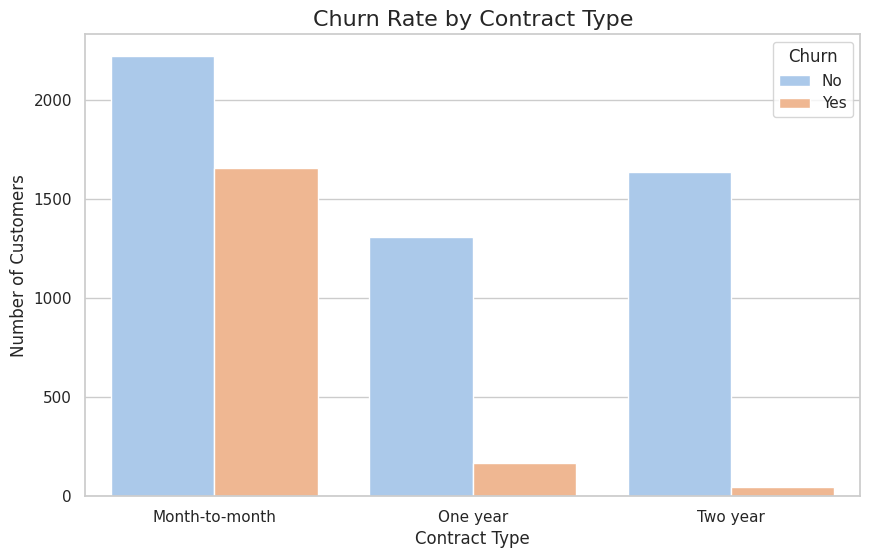

In [5]:
print("Step 5: Generating Plot 1 - Churn by Contract...")

# 1. Create a new figure (plot canvas)
plt.figure(figsize=(10, 6))

# 2. Create the countplot
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')

# 3. Add titles and labels
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', loc='upper right')

# 4. Save the plot as a file
plt.savefig('1_contract_churn.png')

print("Plot 1 saved successfully as '1_contract_churn.png'")

**Observation**: This chart is the most important finding. The "Month-to-month" bar has a massive, disproportionate amount of churn (the orange bar). In contrast, the "One year" and "Two year" contract bars are almost entirely "No Churn" (the blue bar).

**Business Insight**: This is our smoking gun. Customers on long-term contracts are extremely loyal. Customers who are not locked in are leaving at an alarming rate.

**Recommendation:The #1 business priority must be to create a strategy to convert "Month-to-month" customers to "One year" plans.**

**Visualization 2 - Churn by Payment Method**

Business Question: "Does the payment method affect churn?" Plot Type: Another countplot. We use y='PaymentMethod' to make the labels horizontal and easier to read.

Step 6: Generating Plot 2 - Churn by Payment Method...
Plot 2 saved successfully as '2_payment_churn.png'


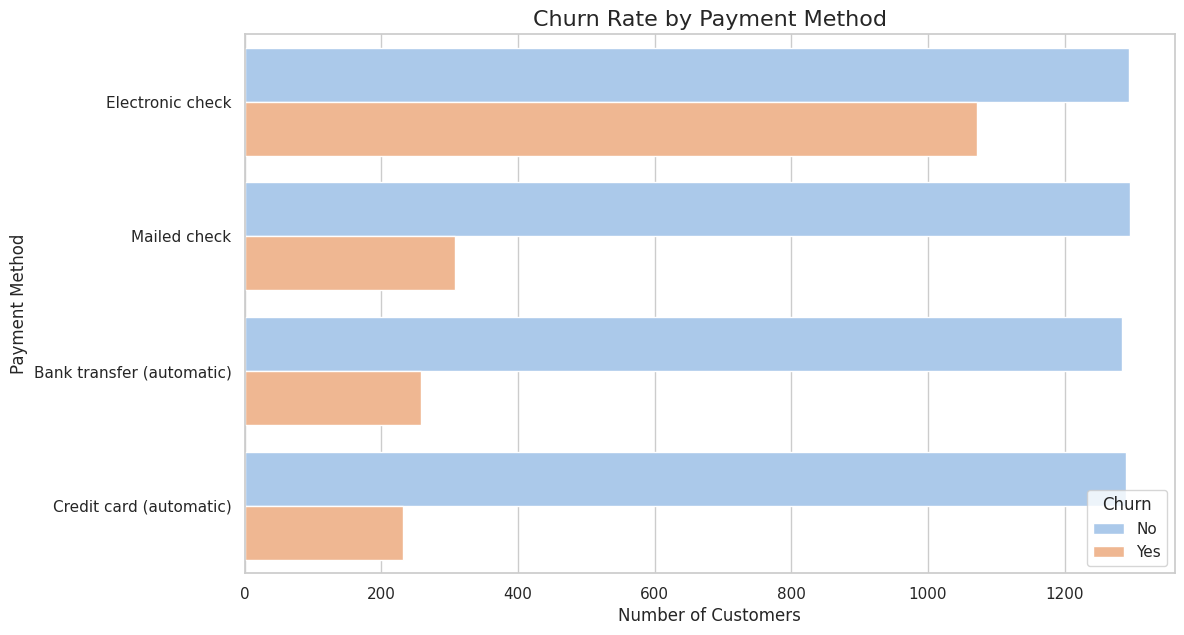

In [6]:
print("Step 6: Generating Plot 2 - Churn by Payment Method...")

# 1. Create the figure
plt.figure(figsize=(12, 7))

# 2. Create the plot (note 'y=' for horizontal bars)
sns.countplot(data=df, y='PaymentMethod', hue='Churn', palette='pastel')

# 3. Add titles and labels
plt.title('Churn Rate by Payment Method', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
plt.legend(title='Churn', loc='lower right')

# 4. Save the plot
plt.savefig('2_payment_churn.png')

print("Plot 2 saved successfully as '2_payment_churn.png'")

Observation: Customers paying with "Electronic check" have a much higher churn rate than any other method. The three other methods (Mailed check, Bank transfer (automatic), Credit card (automatic)) are all much "stickier."

Business Insight: "Electronic check" is a manual payment method. The customer has to choose to pay you each month, which gives them a monthly opportunity to rethink their subscription and cancel. The "automatic" methods are "set it and forget it," which leads to loyalty.

**Recommendation: We should launch a marketing campaign to incentivize customers to switch from "Electronic check" to "Bank transfer (automatic)" or "Credit card (automatic)," perhaps by offering a $5 discount on their next bill.**

**Visualization 3 - Churn vs. Monthly Charges**

Step 7: Generating Plot 3 - Churn vs. Monthly Charges...
Plot 3 saved successfully as '3_monthly_charges_churn.png'


/tmp/ipython-input-4151084617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')


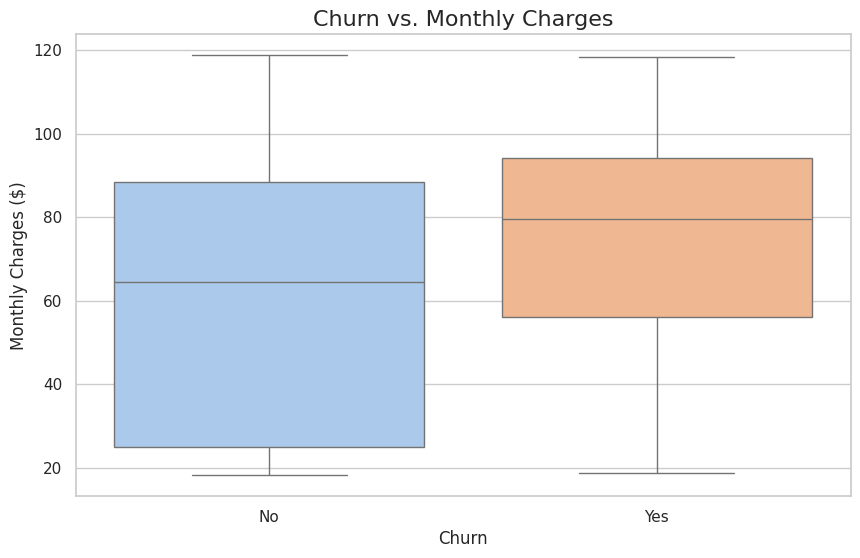

In [7]:
print("Step 7: Generating Plot 3 - Churn vs. Monthly Charges...")

# 1. Create the figure
plt.figure(figsize=(10, 6))

# 2. Create the boxplot
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')

# 3. Add titles and labels
plt.title('Churn vs. Monthly Charges', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)

# 4. Save the plot
plt.savefig('3_monthly_charges_churn.png')

print("Plot 3 saved successfully as '3_monthly_charges_churn.png'")

Observation: The boxplot for "Yes" (Churn) is noticeably higher than the box for "No." The median (the line in the middle of the box) for churners is around $80, while the median for non-churners is lower, around $65.

Business Insight: Customers who churn are, on average, paying higher monthly bills. This suggests a price sensitivity. They might be on expensive plans they don't feel are providing value.

**Recommendation: When a high-paying customer (e.g., >$75/month) on a "Month-to-month" contract calls to complain, our support team should be empowered to offer them a downgrade or a discount immediately.**

**Visualization 4 - Churn by Tenure**

Business Question: "When are customers leaving? Are new customers or old customers more at-risk?" Plot Type: A histplot (histogram) is perfect for seeing the distribution of a number (tenure) over time.

Step 8: Generating Plot 4 - Churn by Tenure...
Plot 4 saved successfully as '4_tenure_churn.png'

--- All EDA steps complete! ---


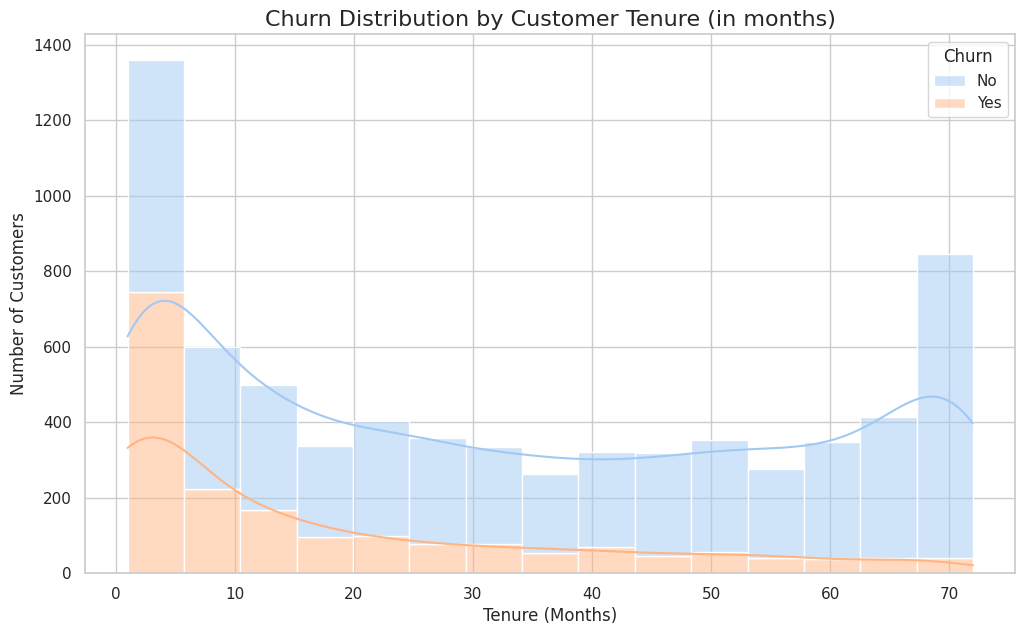

In [8]:
print("Step 8: Generating Plot 4 - Churn by Tenure...")

# 1. Create the figure
plt.figure(figsize=(12, 7))

# 2. Create the histogram
# 'kde=True' adds a smooth line, 'multiple="stack"' layers the bars
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple="stack", palette='pastel')

# 3. Add titles and labels
plt.title('Churn Distribution by Customer Tenure (in months)', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# 4. Save the plot
plt.savefig('4_tenure_churn.png')

print("Plot 4 saved successfully as '4_tenure_churn.png'")
print("\n--- All EDA steps complete! ---")

Observation: The orange "Yes" (Churn) bars are heavily concentrated on the far left of the chart. The vast majority of churn happens to customers with very low tenure (e.g., in their first 0-10 months). As tenure increases, the blue "No Churn" bars dominate.

Business Insight: The first 10 months are the "danger zone." If we can get a customer to stay with us for one year, they are very likely to stay for good. Our customer onboarding process might be weak.

**Recommendation: We need to improve our onboarding. The retention campaign should be most aggressive for customers in this 0-10 month "danger zone."**

# Building the Machine Learning Pipeline.

Data Preprocessing

In [9]:
# 2. Clean 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Drop missing values
df.dropna(inplace=True)

print("Step 9: Data reloaded and cleaned successfully.")
print(f"Clean data shape: {df.shape}")

Step 9: Data reloaded and cleaned successfully.
Clean data shape: (7032, 21)


Drop the customerID Column

The customerID is unique to every customer. It's like a name. It has no predictive power (a customer's ID doesn't make them churn), so we must drop it.

In [10]:
# Use the .drop() method to remove the 'customerID' column
# 'axis=1' tells pandas we are dropping a COLUMN, not a row
df_processed = df.drop('customerID', axis=1)

print("Step 10: 'customerID' column dropped.")
print(f"Data shape is now: {df_processed.shape}")

Step 10: 'customerID' column dropped.
Data shape is now: (7032, 20)


Convert the Target Variable (Churn)

We need to convert our target variable, Churn, from text ("Yes" / "No") to numbers (1 / 0).

In [11]:
# We can use the .map() function for a simple replacement
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})

print("Step 11: 'Churn' column converted from Yes/No to 1/0.")
print("First 5 'Churn' values:")
print(df_processed['Churn'].head())

Step 11: 'Churn' column converted from Yes/No to 1/0.
First 5 'Churn' values:
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


**Convert All Other Text Columns (One-Hot Encoding)**

This is the most powerful step. We will use a pandas function called get_dummies to find all remaining text columns (Contract, PaymentMethod, gender, etc.) and automatically convert them to numeric columns.
This method is called "One-Hot Encoding." It will:
Take Contract (with 3 values) and split it into new columns like Contract_Month-to-month, Contract_One year, etc.
It will put a 1 or 0 in each new column.
It will wisely leave our numeric columns alone (tenure, MonthlyCharges).

In [12]:
# pd.get_dummies() will automatically find all 'object' (text) columns
# and convert them.
# 'drop_first=True' is a best practice. It avoids redundant columns.
# (e.g., for 'gender', we only need 'gender_Male'. If 0, we know it's Female)

df_processed = pd.get_dummies(df_processed, drop_first=True)

print("Step 12: All text columns converted to numbers via get_dummies.")
print("--- New Processed DataFrame (first 5 rows) ---")
print(df_processed.head())
print(f"\nOur dataset now has {df_processed.shape[1]} columns, all numeric.")

Step 12: All text columns converted to numbers via get_dummies.
--- New Processed DataFrame (first 5 rows) ---
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            Tru

**Define Your Features (X) and Target (y)**

Now that our whole table is numeric, we can split it into two parts:

y (The Target): The one thing we want to predict (Churn).

X (The Features): All the other columns we will use to make the prediction (tenure, Contract_One year, etc.).

In [13]:
# 'y' is just the 'Churn' column
y = df_processed['Churn']

# 'X' is everything ELSE. We drop the 'Churn' column to create it.
X = df_processed.drop('Churn', axis=1)

print("Step 13: Created 'X' (Features) and 'y' (Target).")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Step 13: Created 'X' (Features) and 'y' (Target).
Shape of X: (7032, 30)
Shape of y: (7032,)


**Split Data into Training and Testing Sets**

This is a critical step in all machine learning. We must split our data.

Training Set (e.g., 80%): The model will learn from this data.

Testing Set (e.g., 20%): The model will never see this data. We use it at the very end to see how accurate our model is on "new" customers.
We use a standard tool, train_test_split, from scikit-learn to do this.

In [14]:
from sklearn.model_selection import train_test_split

# This function does the split for us.
# test_size=0.2 means 20% of the data will be for testing.
# random_state=42 ensures we get the same "random" split every time
# we run this code, making our results reproducible.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Step 14: Data split into Training and Testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Step 14: Data split into Training and Testing sets.
X_train shape: (5625, 30)
X_test shape: (1407, 30)


**Decision Tree Classifier**


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
# 'max_depth=5' keeps the tree simple and readable
# 'random_state=42' ensures you get the same result every time
model = DecisionTreeClassifier(max_depth=5, random_state=42)

print("Step 15: Decision Tree model initialized successfully.")

Step 15: Decision Tree model initialized successfully.


**Train the Model**

Now we will "train" the model. This is the "learning" step. We use the .fit() method to show the model our X_train (the features) and y_train (the answers) so it can learn the patterns that lead to churn.

In [16]:
# 'model.fit()' is the training command
# It learns the patterns from the training data
model.fit(X_train, y_train)

print("Step 16: Model training complete.")

Step 16: Model training complete.


**Make Predictions**

The model is now trained. We will use it to make predictions on the X_test data, which it has never seen before. This will tell us how good it is at predicting churn for "new" customers.

We use the .predict() method on X_test.
The output, y_pred, will be the model's guesses (1 for Churn, 0 for No Churn).

In [17]:
# 'model.predict()' uses the trained model to make predictions
# on the unseen test features (X_test)
y_pred = model.predict(X_test)

print("Step 17: Predictions made on the test set.")
print("First 20 predictions:", y_pred[:20])

Step 17: Predictions made on the test set.
First 20 predictions: [0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


**Evaluate Model Performance**

 We compare the model's predictions (y_pred) to the actual answers (y_test) to see how accurate it is.

We will import accuracy_score and classification_report from sklearn.metrics.

Accuracy: Gives us a single percentage (e.g., "77% accurate").

Classification Report: Gives a detailed breakdown of Precision and Recall, which is much more useful.

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# 1. Calculate the overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Step 18: Evaluating Model Performance...")
print(f"--- Overall Model Accuracy: {accuracy * 100:.2f}% ---")
print("\n")

# 2. Generate the detailed Classification Report
# This shows Precision and Recall for both 'No Churn' and 'Will Churn'
print("--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Will Churn']))

Step 18: Evaluating Model Performance...
--- Overall Model Accuracy: 77.54% ---


--- Detailed Classification Report ---
              precision    recall  f1-score   support

    No Churn       0.85      0.84      0.85      1033
  Will Churn       0.58      0.59      0.58       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.78      0.78      1407



/tmp/ipython-input-660889753.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_features, x='Importance', y='Feature', palette='viridis')


Plot saved successfully as '5_feature_importance.png'


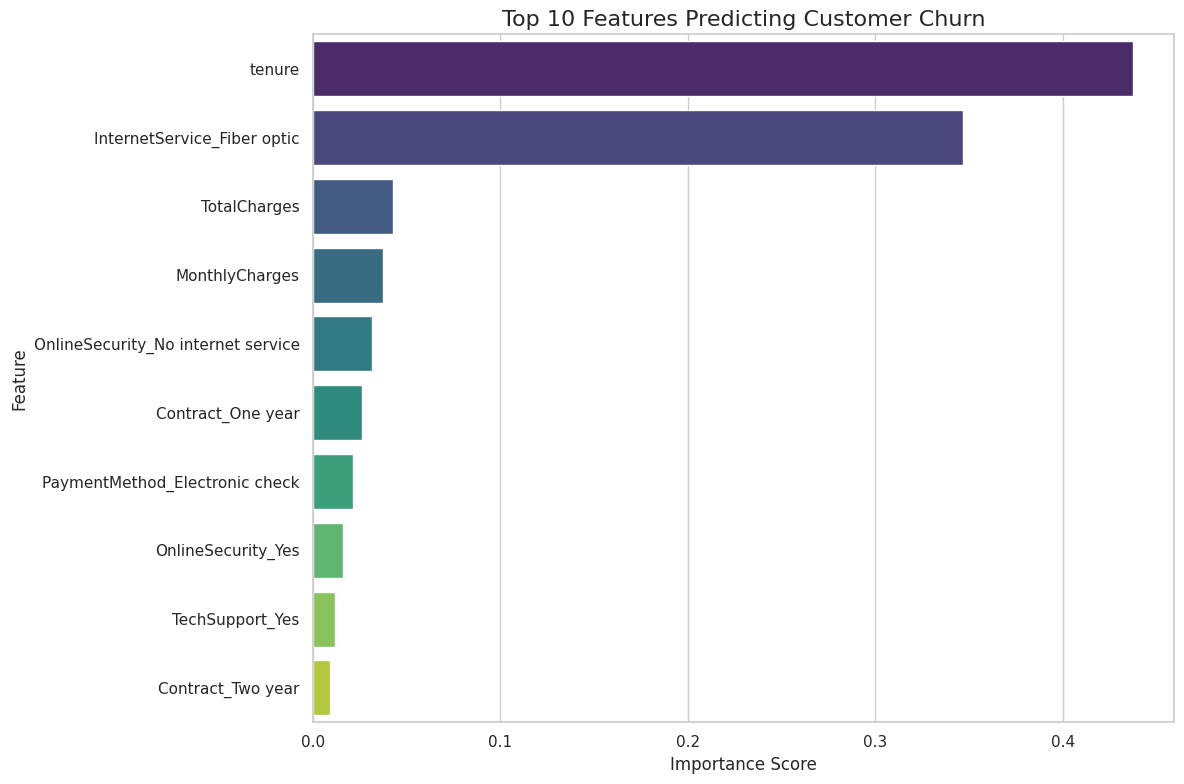

In [19]:
# --- Get and Visualize Feature Importances ---
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# --- Plotting ---
top_10_features = feature_importance_df.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features Predicting Customer Churn', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('5_feature_importance.png')
print("Plot saved successfully as '5_feature_importance.png'")

**Generate Decision tree**

--- Running Code for 6_decision_tree.png ---
Model trained.
Plot saved successfully as '6_decision_tree.png'


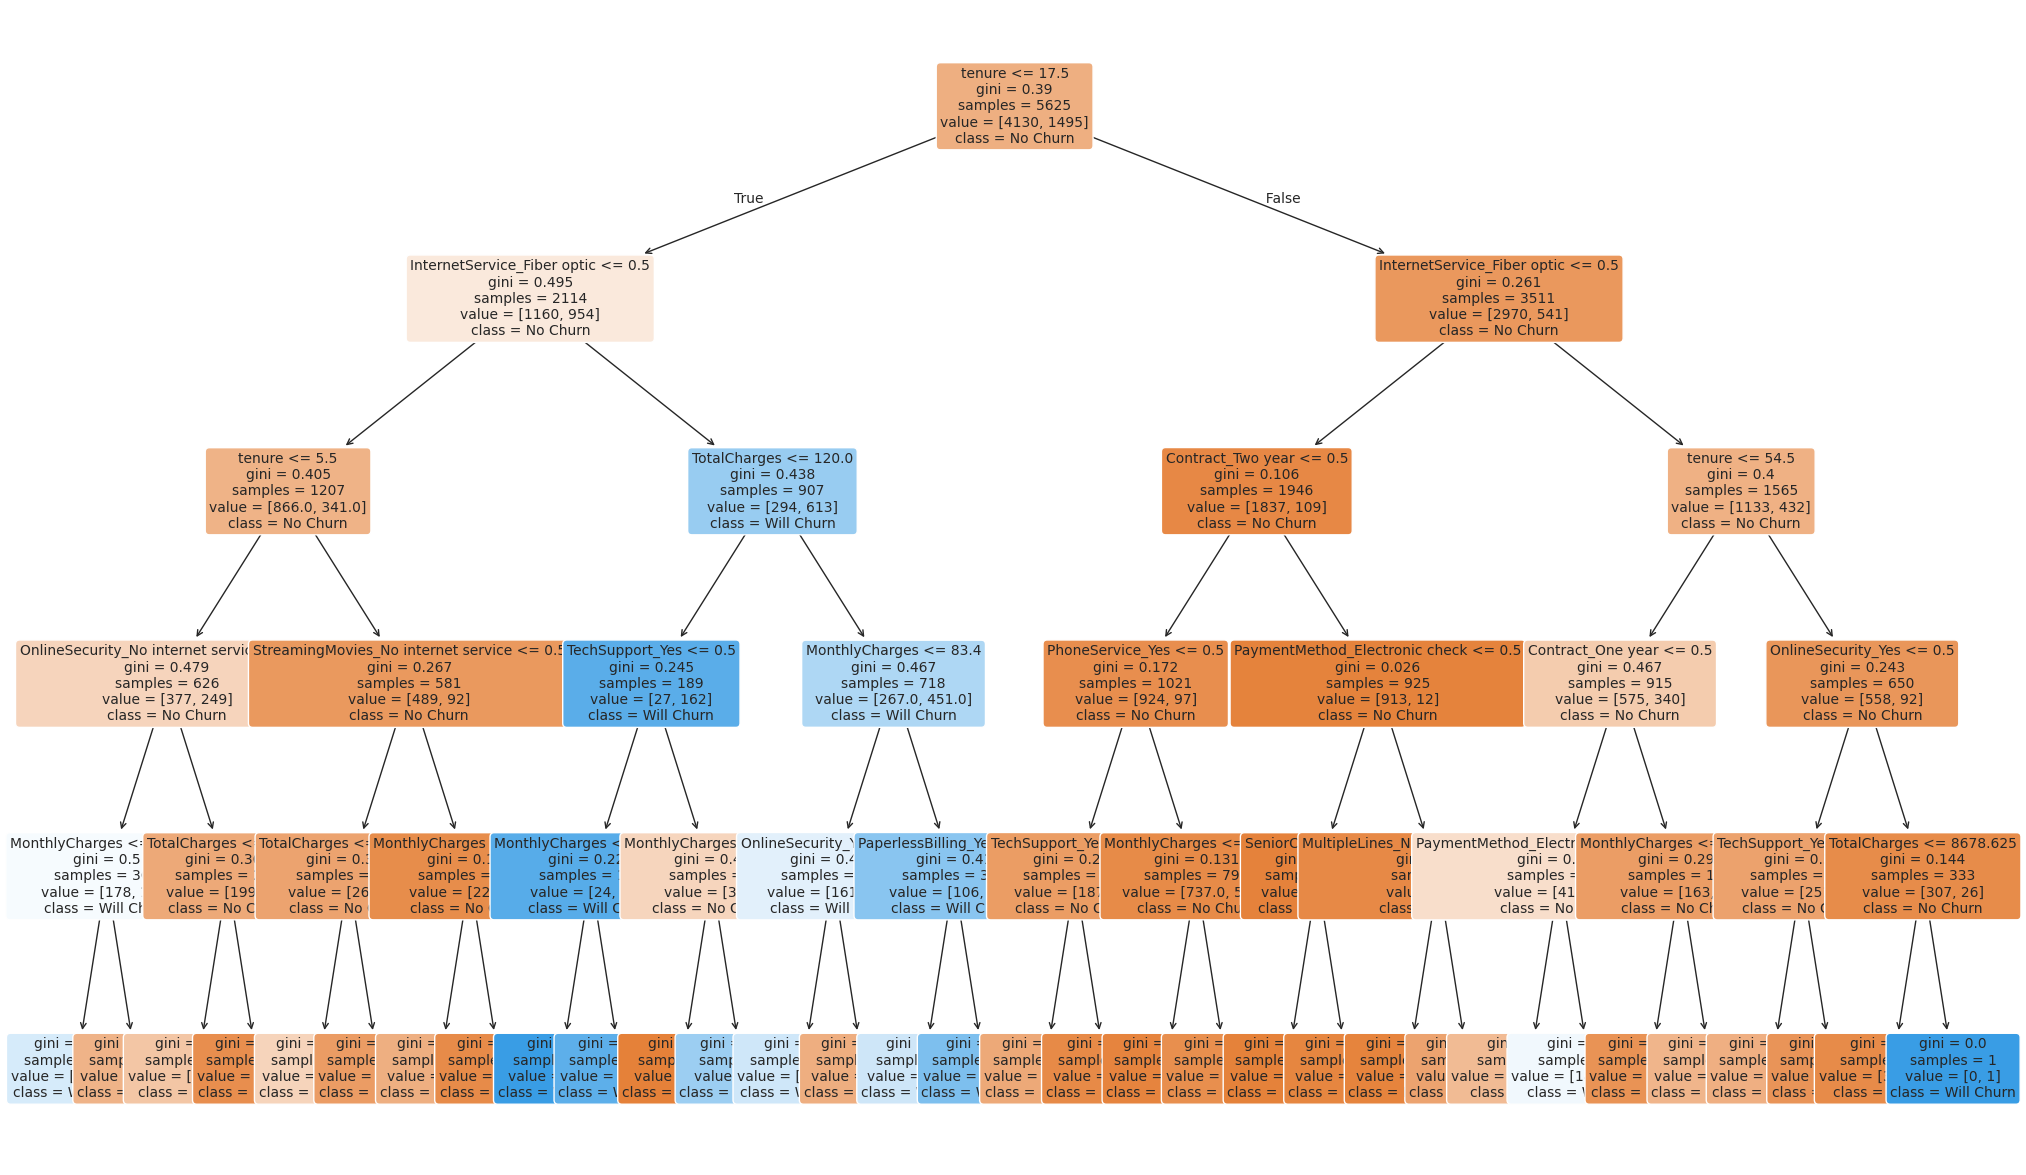

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

print("--- Running Code for 6_decision_tree.png ---")

# --- Setup: Load, Clean, and Process Data ---
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

df_processed = df.drop('customerID', axis=1)
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})
df_processed = pd.get_dummies(df_processed, drop_first=True)

y = df_processed['Churn']
X = df_processed.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Model ---
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
print("Model trained.")

# --- Get Feature Names for Plot ---
feature_names = X.columns.tolist()

# --- Plotting ---
plt.figure(figsize=(25, 15))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=['No Churn', 'Will Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)

# Save the plot
plt.savefig('6_decision_tree.png', dpi=300)
print("Plot saved successfully as '6_decision_tree.png'")